In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


**Importing the dataset**

In [ ]:
data  = pd.read_csv('Social_Network_Ads.csv')

In [ ]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [ ]:
#drop the column User ID 
data.drop(['User ID'] , inplace=True , axis = 1)

In [ ]:
data.shape

(400, 4)

In [ ]:
X = data.iloc[: , 0:-1]

In [ ]:
y = data.loc[: , 'Purchased']

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2 , random_state = 10)

**Feature Scaling**

In [ ]:
#scalling gender using label encoder 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
LE = LabelEncoder()

In [ ]:
X_train.loc[: ,'Gender'] = LE.fit_transform(X_train.loc[:, 'Gender'])

In [ ]:
X_test.loc[:, 'Gender'] = LE.fit_transform(X_test.loc[:, 'Gender'])

In [ ]:
MM = MinMaxScaler()

In [ ]:
X_train.iloc[: , 1:] = MM.fit_transform(X_train.iloc[: , 1:])

In [ ]:
X_test.iloc[: ,1:] = MM.fit_transform(X_test.iloc[:, 1:])

**Fitting K-NN to the Training set**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN = KNeighborsClassifier()

In [ ]:
KNN.fit(X_train , y_train)

KNeighborsClassifier()

**Predicting the Test set results**

In [ ]:
y_pred = KNN.predict(X_test)

In [ ]:
print(y_pred)

[0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1
 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0
 0 0 0 0 1 1]


**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

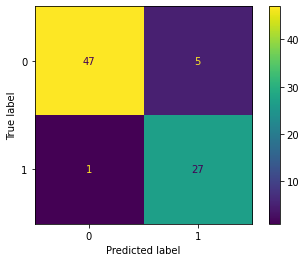

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test ,y_pred)